# Chapter 1

In [21]:
%matplotlib inline
import os
import sys

import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd

import mglearn

### General Notes
X is input (samples), y is output (target)

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## Classifying Iris Species

In [5]:
iris_dataset = load_iris()

In [6]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'feature_names', 'DESCR'])

In [8]:
print(iris_dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

the possible species are called _classes_

In [9]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

_label_

In [53]:
iris_dataset['target_names'][0]

'setosa'

the qualities of targets are called _features_

In [10]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris_dataset['data'].shape

(150, 4)

Here are 5 _samples_, or individual items

In [12]:
iris_dataset['data'][:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

## Training and testing data
train = 75%
test = 25%

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [17]:
X_train.shape

(112, 4)

In [18]:
X_test.shape

(38, 4)

In [19]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset['feature_names'])

## Pair plot
Visualize all possible pairs of data.
Does **NOT** show _interaction_ of all features.

<IPython.core.display.Javascript object>


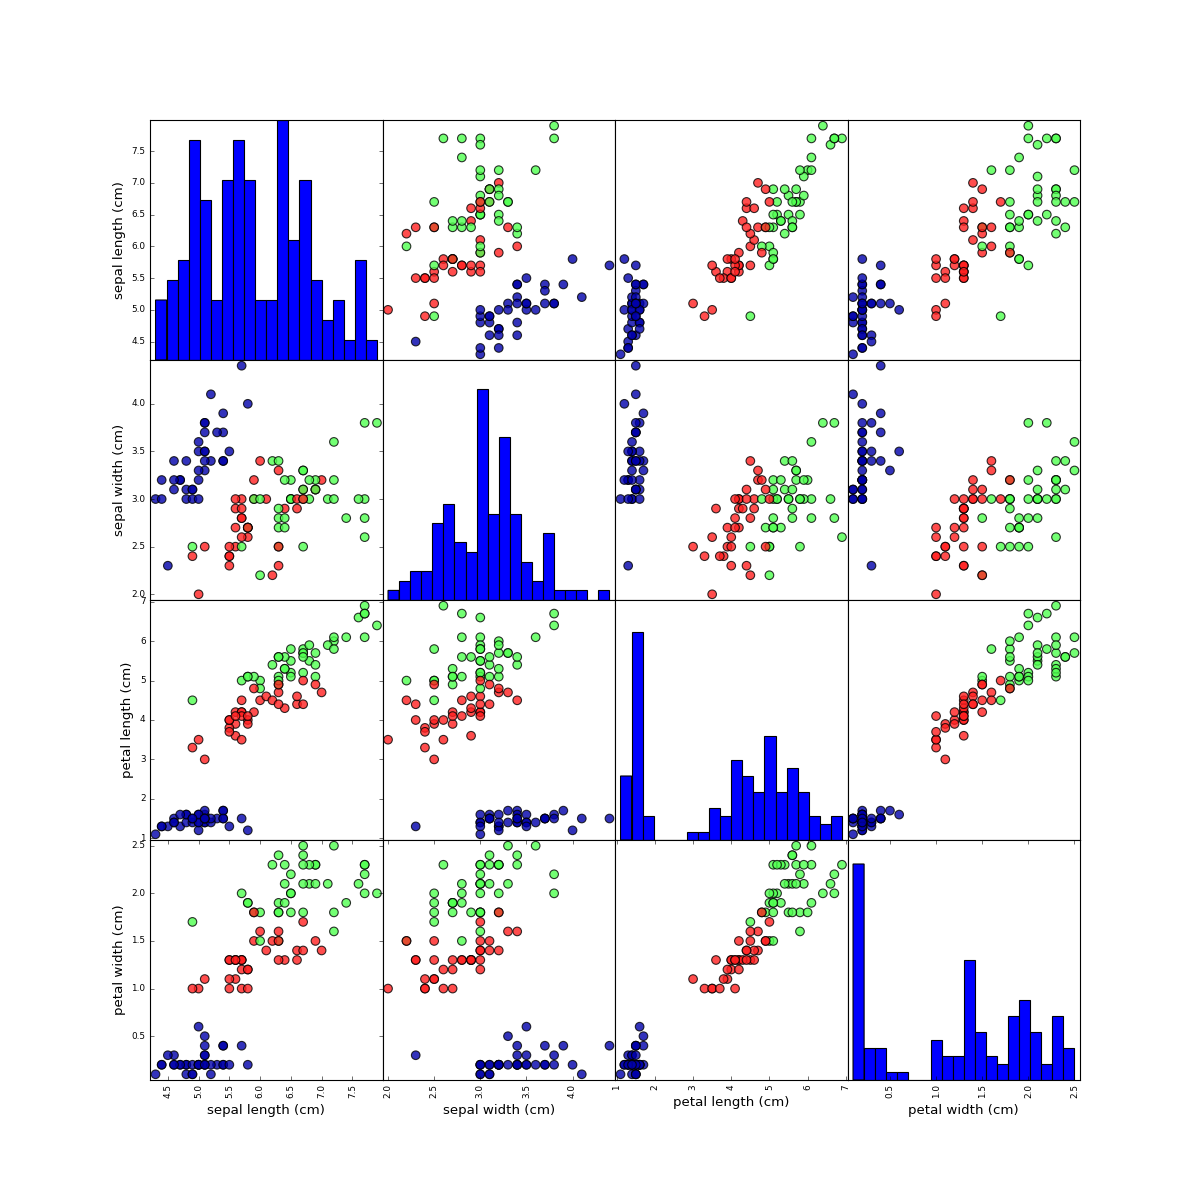

In [20]:
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o',
                       hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

##  k-Nearest Neighbors
Finds the closest training set data point(s) for a new data entry.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)

The classifier is an object, that is modified in place when fit()

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Making predictions

In [25]:
X_new = np.array([[5,2.9,1,0.2]])

In [26]:
X_new.shape

(1, 4)

predict returns the index of the target

In [27]:
prediction = knn.predict(X_new)

In [31]:
iris_dataset['target_names'][prediction]

array(['setosa'], 
      dtype='<U10')

### Evaluating the model

In [34]:
y_pred = knn.predict(X_test)

In [50]:
# predicted target codes
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [51]:
# name of the preditions
[iris_dataset['target_names'][y] for y in y_pred]

['virginica',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'setosa',
 'versicolor',
 'versicolor',
 'setosa',
 'setosa',
 'virginica',
 'versicolor',
 'setosa',
 'setosa',
 'virginica',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'setosa',
 'virginica',
 'versicolor',
 'setosa',
 'virginica',
 'virginica',
 'versicolor',
 'setosa',
 'virginica']

In [52]:
# how did the test set accuracy fare?
knn.score(X_test, y_test)

0.97368421052631582